## Homework 06: Optimization in Python

## Due Date: Apr 06, 2020, 08:00am

#### Firstname Lastname: 

#### E-mail: 

#### Enter your solutions and submit this notebook

---

**Problem 1 (30p)**

We examine a product of non-negative numbers given their sum. Concretely, the problem is to find all $(x, y, z)$ among all non-negative reals $x, y, z \geq 0$ such that
their product $P(x, y, z) = x y z$ is maximized, given their sum $x + y + z = 300$. 


1.1. (15p)
Cast and solve the problem as a non-constrained optimization problem;
use "scipy.optimize.minimize" with method='BFGS'

1.2. (15p)
Cast and solve the problem as a constrained optimization problem;
use "scipy.optimize.minimize" with method='L-BFGS-B'


**Hint**
There are three variables. Use that the sum is given, and analogous ideas from "Minimizing the area of a cylinder with unit volume" presented in the Lecture, to obtain the objective function of one variable.

1.1. The problem is unconstrained. 

1.2. The problem is constrained. Define a proper bound of the input variable. 



---

**Problem 2 (70p)**

Let us consider the following function,

$$h(x, y) := (x^2 + y - 10)^2 + (x + y^2 - 16)^2$$.
    
find **all extremal** points (both minima and maxima) in the region $-10 \leq x, y \leq 10$.


The goal is to: (a) find extremal points; (b) compare convergence, i.e. the numbers of: Iterations, Function evaluations, Gradient evaluations, Hessian evaluations.


Solve the problem by using the Newton optimization routine "scipy.optimize.fmin_ncg":

2.1. (20p) providing gradient (fprime) and Hessian (fhess) in "scipy.optimize.fmin_ncg"

2.2. (20p) providing only gradient (fprime) in "scipy.optimize.fmin_ncg"

2.3. (20p) **not** providing gradient (fprime) or Hessian in "scipy.optimize.fmin_ncg"


To calculate the gradient and Hessian use **sympy.diff** analogously to the computation from the Lecture notes (make sure the gradient and Hessian are correctly computed).


2.4. (10p) Plot $h(x, y)$ in the given region $-10 \leq x, y \leq 10$.


**Hint**: Note there are **5** extremal points in the given region. So one has to run the Newton routine with different starting points in order to find different extremal points. 


For every extremal point reprot: 
- (xopt, yopt)
- h(xopt, yopt)
- (xstart, ystart)
- the number of Iterations
- the number of Function evaluations
- the number of Gradient evaluations
- the number of Hessian evaluations.

**Hint 2:** There are 4 local mimima and 1 maximum; notice that "scipy.optimize.fmin_ncg" finds "minimum" not the "maximum". To locate the minima partition $-10 \leq x, y \leq 10$ into 4 regions and use "optimize.brute" in each of these regions. Then use these 4 points as starting points in "scipy.optimize.fmin_ncg" -- as in the Lecture.


## Solutions

### Problem 1

In [1]:
import cvxopt
from scipy import optimize


import matplotlib.pyplot as plt
import numpy as np
import sympy

#for best printing 
sympy.init_printing()

In [2]:
%matplotlib inline

Denote $S = x + y + z$ and $S=300$ is given. Then $z = S - x - y$ and the product as a function of two variables becomes $P(x, y) = xy (S - x - y)$. Taking a partial derivative in $y$ and solving $\partial P(x, y) / \partial y = 0$ it follows: (1) $x=0$ which will not give the global maximum, or (2) $z = y$ which we further consider.


Moreover now $y = (S - x) / 2$ and $P(x) = x (S - x ) ^ 2$.


In [106]:
S = 300

import math 
def f(x):
    return -x* ((S - x)/2)**2


# unconstrained optimization
x_opt = optimize.minimize(f, np.array([1]), method='BFGS').x

# constrained optimization
bnd_x1 = (0, S)

# #'L-BFGS-B limited-memory with bound constraints
x_const_opt = optimize.minimize(f, np.array([2]), method='L-BFGS-B', bounds=[bnd_x1]).x


In [107]:
print(x_opt, (S - x_opt) / 2,  (S - x_opt) / 2)

[99.99998982] [100.00000509] [100.00000509]


In [108]:
print(x_const_opt,  (S - x_const_opt) / 2,  (S - x_const_opt) / 2)

[100.0000002] [99.9999999] [99.9999999]


In [109]:
print("P_max = %f" % -f(x_opt))

P_max = 1000000.000000


In [110]:
print("P_max = %f" % -f(x_const_opt))

P_max = 1000000.000000


### Problem 2

In [112]:
x, y = sympy.symbols("x, y")
f_sym = (x**2 + y - 10) ** 2 + (x + y**2 - 16)**2
fprime_sym = [f_sym.diff(x_) for x_ in (x, y)]

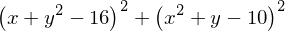

In [113]:
f_sym

In [114]:
fprime_sym

In [115]:
fhessian_sym = [[f_sym.diff(u, v) for u in (x, y)] for v in (x, y)]

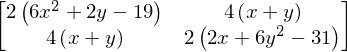

In [116]:
sympy.Matrix(fhessian_sym)

In [117]:
f_lambda = sympy.lambdify((x, y), f_sym, 'numpy')
fprime_lambda = sympy.lambdify((x, y), fprime_sym, 'numpy')
fhessian_lambda = sympy.lambdify((x, y), fhessian_sym, 'numpy')

In [118]:
def func_to_vector(f):
    """
    Wrapper for f(X) -> f(X[0], X[1])
    """
    return lambda x: np.array(f(x[0], x[1]))

f = func_to_vector(f_lambda)
fprime = func_to_vector(fprime_lambda)
fhess = func_to_vector(fhessian_lambda)

In [119]:
x_start1 = optimize.brute(f, (slice(-10, 0, 0.5), slice(-10, 0, 0.5))) 
print(x_start1)
x_start2 = optimize.brute(f, (slice(-10, 0, 0.5), slice(0, 10, 0.5))) 
print(x_start2)
x_start3 = optimize.brute(f, (slice(0, 10, 0.5), slice(-10, 0, 0.5))) 
print(x_start3)
x_start4 = optimize.brute(f, (slice(0, 10, 0.5), slice(0, 10, 0.5))) 
print(x_start4)

[-3.8013269  -4.44984144]
[-2.38986779  4.28834369]
[ 3.67566063 -3.51057275]
[2.51548382 3.67210702]


### 2.1

In [120]:
x_opt1 = optimize.fmin_ncg(f, x_start1, fprime=fprime, fhess=fhess)

print('(xopt, yopt) = ', x_opt1)
print('h(xopt, yopt) = ', f(x_opt1))
print('(xstart, ystart) = ', x_start1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
(xopt, yopt) =  [-3.80129779 -4.44986492]
h(xopt, yopt) =  3.1554436208840472e-30
(xstart, ystart) =  [-3.8013269  -4.44984144]


In [121]:
x_opt2 = optimize.fmin_ncg(f, x_start2, fprime=fprime, fhess=fhess)

print('\n(xopt, yopt) = ', x_opt2)
print('h(xopt, yopt) = ', f(x_opt2))
print('(xstart, ystart) = ', x_start2)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2

(xopt, yopt) =  [-2.38990681  4.28834546]
h(xopt, yopt) =  1.8298601614532996e-21
(xstart, ystart) =  [-2.38986779  4.28834369]


In [122]:
x_opt3 = optimize.fmin_ncg(f, x_start3, fprime=fprime, fhess=fhess)

print('\n(xopt, yopt) = ', x_opt3)
print('h(xopt, yopt) = ', f(x_opt3))
print('(xstart, ystart) = ', x_start3)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2

(xopt, yopt) =  [ 3.67567701 -3.51060151]
h(xopt, yopt) =  1.1639560615001886e-23
(xstart, ystart) =  [ 3.67566063 -3.51057275]


In [123]:
x_opt4 = optimize.fmin_ncg(f, x_start4, fprime=fprime, fhess=fhess)

print('\n(xopt, yopt) = ', x_opt4)
print('h(xopt, yopt) = ', f(x_opt4))
print('(xstart, ystart) = ', x_start4)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2

(xopt, yopt) =  [2.51552758 3.67212097]
h(xopt, yopt) =  6.310887241768095e-30
(xstart, ystart) =  [2.51548382 3.67210702]


In [124]:
x_opt5 = optimize.fmin_ncg(lambda x:-f(x), (0,0), fprime=lambda x:-fprime(x), fhess=lambda x:-fhess(x))

print('\n(xopt, yopt) = ', x_opt5)
print('h(xopt, yopt) = ', f(x_opt5))
print('(xstart, ystart) = ', (0, 0))

Optimization terminated successfully.
         Current function value: -372.650768
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 16
         Hessian evaluations: 8

(xopt, yopt) =  [-0.88439887 -0.28267788]
h(xopt, yopt) =  372.6507683966739
(xstart, ystart) =  (0, 0)


In [125]:
x_opt_fh = [x_opt1, x_opt2, x_opt3, x_opt4, x_opt5]
x_opt_fh

[array([-3.80129779, -4.44986492]),
 array([-2.38990681,  4.28834546]),
 array([ 3.67567701, -3.51060151]),
 array([2.51552758, 3.67212097]),
 array([-0.88439887, -0.28267788])]

### 2.2

In [126]:
x_opt1 = optimize.fmin_ncg(f, x_start1, fprime=fprime)

print('\n(xopt, yopt) = ', x_opt1)
print('h(xopt, yopt) = ', f(x_opt1))
print('(xstart, ystart) = ', x_start1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 12
         Hessian evaluations: 0

(xopt, yopt) =  [-3.80129779 -4.44986492]
h(xopt, yopt) =  1.2488671607420624e-18
(xstart, ystart) =  [-3.8013269  -4.44984144]


In [127]:
x_opt2 = optimize.fmin_ncg(f, x_start2, fprime=fprime)

print('\n(xopt, yopt) = ', x_opt2)
print('h(xopt, yopt) = ', f(x_opt2))
print('(xstart, ystart) = ', x_start2)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 14
         Hessian evaluations: 0

(xopt, yopt) =  [-2.3899068   4.28834546]
h(xopt, yopt) =  2.5424947994752875e-17
(xstart, ystart) =  [-2.38986779  4.28834369]


In [128]:
x_opt3 = optimize.fmin_ncg(f, x_start3, fprime=fprime)

print('\n(xopt, yopt) = ', x_opt3)
print('h(xopt, yopt) = ', f(x_opt3))
print('(xstart, ystart) = ', x_start3)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 10
         Hessian evaluations: 0

(xopt, yopt) =  [ 3.67567701 -3.51060151]
h(xopt, yopt) =  2.397246264985697e-18
(xstart, ystart) =  [ 3.67566063 -3.51057275]


In [129]:
x_opt4 = optimize.fmin_ncg(f, x_start4, fprime=fprime)

print('\n(xopt, yopt) = ', x_opt4)
print('h(xopt, yopt) = ', f(x_opt4))
print('(xstart, ystart) = ', x_start4)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 14
         Hessian evaluations: 0

(xopt, yopt) =  [2.51552759 3.67212097]
h(xopt, yopt) =  3.498116851004233e-18
(xstart, ystart) =  [2.51548382 3.67210702]


In [130]:
x_opt5 = optimize.fmin_ncg(lambda x:-f(x), (0,0), fprime=lambda x:-fprime(x))

print('\n(xopt, yopt) = ', x_opt5)
print('h(xopt, yopt) = ', f(x_opt5))
print('(xstart, ystart) = ', (0,0))

Optimization terminated successfully.
         Current function value: -372.650768
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 36
         Hessian evaluations: 0

(xopt, yopt) =  [-0.88439887 -0.28267788]
h(xopt, yopt) =  372.650768396674
(xstart, ystart) =  (0, 0)


In [131]:
x_opt_f = [x_opt1, x_opt2, x_opt3, x_opt4, x_opt5]
x_opt_f

[array([-3.80129779, -4.44986492]),
 array([-2.3899068 ,  4.28834546]),
 array([ 3.67567701, -3.51060151]),
 array([2.51552759, 3.67212097]),
 array([-0.88439887, -0.28267788])]

### 2.3

In [132]:
x_opt1 = optimize.fmin_bfgs(f, x_start1)

print('\n(xopt, yopt) = ', x_opt1)
print('h(xopt, yopt) = ', f(x_opt1))
print('(xstart, ystart) = ', x_start1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5

(xopt, yopt) =  [-3.80129781 -4.44986492]
h(xopt, yopt) =  8.746856054002125e-15
(xstart, ystart) =  [-3.8013269  -4.44984144]


In [133]:
x_opt2 = optimize.fmin_bfgs(f, x_start2)

print('\n(xopt, yopt) = ', x_opt2)
print('h(xopt, yopt) = ', f(x_opt2))
print('(xstart, ystart) = ', x_start2)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5

(xopt, yopt) =  [-2.3899068   4.28834546]
h(xopt, yopt) =  4.3040781251682245e-15
(xstart, ystart) =  [-2.38986779  4.28834369]


In [134]:
x_opt3 = optimize.fmin_bfgs(f, x_start3)

print('\n(xopt, yopt) = ', x_opt3)
print('h(xopt, yopt) = ', f(x_opt3))
print('(xstart, ystart) = ', x_start3)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5

(xopt, yopt) =  [ 3.675677   -3.51060151]
h(xopt, yopt) =  9.986697990399583e-15
(xstart, ystart) =  [ 3.67566063 -3.51057275]


In [135]:
x_opt4 = optimize.fmin_bfgs(f, x_start4)

print('\n(xopt, yopt) = ', x_opt4)
print('h(xopt, yopt) = ', f(x_opt4))
print('(xstart, ystart) = ', x_start4)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5

(xopt, yopt) =  [2.51552757 3.67212096]
h(xopt, yopt) =  2.0705529456948687e-14
(xstart, ystart) =  [2.51548382 3.67210702]


In [136]:
x_opt5 = optimize.fmin_bfgs(lambda x:-f(x), (0,0))

print('\n(xopt, yopt) = ', x_opt5)
print('h(xopt, yopt) = ', f(x_opt5))
print('(xstart, ystart) = ', (0,0))

Optimization terminated successfully.
         Current function value: -372.650768
         Iterations: 6
         Function evaluations: 32
         Gradient evaluations: 8

(xopt, yopt) =  [-0.88439905 -0.28267784]
h(xopt, yopt) =  372.65076839667336
(xstart, ystart) =  (0, 0)


In [137]:
x_opt_no = [x_opt1, x_opt2, x_opt3, x_opt4, x_opt5]
x_opt_no

[array([-3.80129781, -4.44986492]),
 array([-2.3899068 ,  4.28834546]),
 array([ 3.675677  , -3.51060151]),
 array([2.51552757, 3.67212096]),
 array([-0.88439905, -0.28267784])]

### 2.4

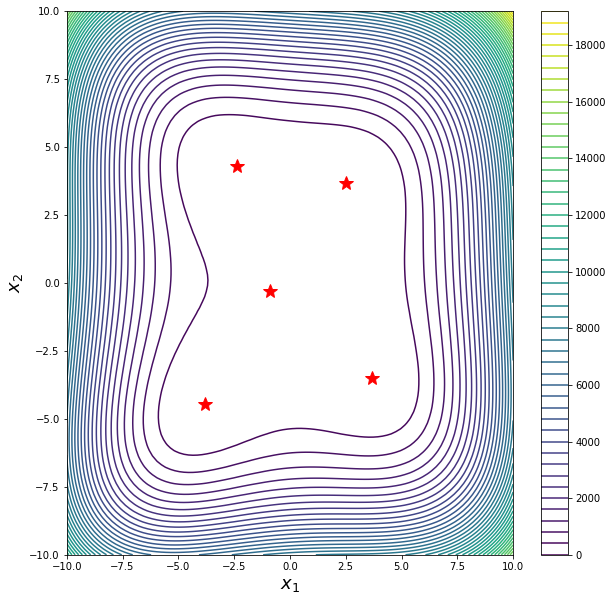

In [138]:
# a contour plot

fig, ax = plt.subplots(figsize=(10, 10))
x1 = x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

# contours
c = ax.contour(X1, X2, f_lambda(X1, X2), 50)

ax.plot(x_opt1[0], x_opt1[1], 'r*', markersize=15)
ax.plot(x_opt2[0], x_opt2[1], 'r*', markersize=15)
ax.plot(x_opt3[0], x_opt3[1], 'r*', markersize=15)
ax.plot(x_opt4[0], x_opt4[1], 'r*', markersize=15)
ax.plot(x_opt5[0], x_opt5[1], 'r*', markersize=15)

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In [143]:
for x in x_opt_no:
    print(x, h(x))   

[-3.80129781 -4.44986492] 82.00000054822002
[-2.3899068   4.28834546] 81.99999921104134
[ 3.675677   -3.51060151] 81.99999957174589
[2.51552757 3.67212096] 81.99999805951455
[-0.88439905 -0.28267784] 171.17093950115355
